## K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

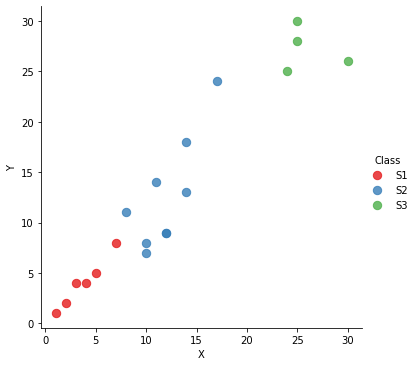

In [5]:
data = pd.read_csv(r'C:\Users\qalha\(1) Learning Python\datasets\knn-test.csv', sep=',')
sns.lmplot('X', 'Y', data=data, hue='Class', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.show()

#### Manually define the KNN class

In [6]:
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

In [7]:
def knn(training_points, test_point, k):
    distance = {}
    dimension = test_point.shape[1]
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        distance[x] = dist[0]
    sorted_d = sorted(distance.items(), key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    class_counter = {}
    for x in range(len(neighbors)):
        cls = training_points.iloc[neighbors[x]][-1]
    if cls in class_counter:
        class_counter[cls] += 1
    else:
        class_counter[cls] = 1
    
    sorted_counter = sorted(class_counter.items(), key=operator.itemgetter(1), reverse=True)
    return(sorted_counter[0][0], neighbors)

In [8]:
test_set = [[3,5]]
test = pd.DataFrame(test_set)
cls,neighbors = knn(data, test, 5)
print("Predicted class: ", cls)

Predicted class:  S1


In [9]:
test_set = [[13,18]]
test = pd.DataFrame(test_set)
cls,neighbors = knn(data, test, 3)
print("Predicted class: ", cls)

Predicted class:  S2


#### Using KNN Classifier from l

In [14]:
dataset = data.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[['X', 'Y']], dataset['Class'], test_size = 0.20)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
print("Predicted class: ", classifier.predict([[3,5]])[0])

Predicted class:  S1


In [18]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
print("Predicted class: ", classifier.predict([[13,18]])[0])

Predicted class:  S2
